### **Problema**
Una agencia inmobiliaria desea mejorar sus estrategias de venta y toma de decisiones al estimar los precios de las viviendas en una ciudad específica. Esta agencia cuenta con un conjunto de datos históricos que incluyen características de las propiedades (como número de habitaciones, baños, ubicación, antigüedad, entre otros) y sus precios de venta.

### **Objetivo**
El objetivo es construir un modelo de predicción que, a partir de las características de una casa, pueda estimar de manera precisa su precio en el mercado. Este modelo ayudará a la agencia a ofrecer estimaciones rápidas a sus clientes y a definir precios más competitivos basados en las características de cada propiedad.

### **Datos disponibles**
La agencia cuenta con un conjunto de datos que incluye las siguientes variables:

### **Superficie de la casa (en metros cuadrados)**

* id: Unique identifier for each property 
* date: Date of property listing 
* price: Property price in currency
* bedrooms: Number of bedrooms 
* bathrooms: Number of bathrooms
* sqft_living: Living area size in square feet
* sqft_lot: Total lot size in square feet
* floors: Number of floors
* waterfront: Indicates if property has waterfront view (0 for no, 1 for yes).
* view: Quality level of property view (0 to 4)
* condition: Overall condition rating (1 to 5)
* grade: Overall grade rating (1 to 13)
* sqft_above: Living area above ground level in square feet
* sqft_basement: Basement area in square feet
* yr_built: Year property was built
* yr_renovated: Year property was last renovated (0 if never)
* zipcode: Property location zip code
* lat: Latitude coordinate of property location
* long: Longitude coordinate of property location
* sqft_living15: Living area size of 15 nearest properties in square feet
* sqft_lot15: Lot size of 15 nearest properties in square feet

### **Desafío:**
Se necesita desarrollar un modelo de aprendizaje automático que, utilizando estos datos, permita predecir el precio de venta de una casa con base en sus características. Además, el modelo debe ser lo suficientemente robusto como para ajustarse a diferentes zonas de la ciudad y ser fácil de actualizar con nuevos datos.

### **Criterios de éxito**

La precisión del modelo en los datos de prueba debe estar por encima de un umbral de error específico.
El modelo debe ser capaz de interpretar qué variables afectan más al precio de venta.
Se debe garantizar que el modelo se pueda adaptar a nuevas zonas de la ciudad en caso de que se disponga de nuevos datos en el futuro.

### **Fuente:** https://www.kaggle.com/datasets/sukhmandeepsinghbrar/housing-price-dataset?select=Housing.csv

### **Tipo de problema:** Regresión


### **Liberías**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error



### **Datos**

In [2]:
df_housing = pd.read_csv("./data/housing.csv")

### **División en Train y Test**

**Variable Target:** Price

In [3]:
target = "price"

In [4]:
#X_train, X_test, y_train, y_test = train_test_split(df_housing.drop(target, axis=1),
#                                                    df_housing[target],
#                                                    test_size=0.2,
#                                                    random_state=42)


In [5]:
#y_train = pd.DataFrame(y_train)

In [6]:
train_set, test_set = train_test_split(df_housing, test_size= 0.2, random_state= 42) #Dividimos en train y test (80/20)

In [7]:
X_train = train_set.drop(target, axis =1) #definimos el target y lo excluimos de x para pasarlo a y tanto en train como en test
y_train = train_set[target]
X_test = test_set.drop(target, axis =1)
y_test = test_set [target]

In [8]:
len(train_set)


17290

In [9]:
len(test_set)

4323

### **Exploración de los datos**

In [10]:
train_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,5467910190,20140527T000000,325000.0,3,1.75,1780,13095,1.0,0,0,...,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,9331800580,20150310T000000,257000.0,2,1.00,1000,3700,1.0,0,0,...,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,2407000405,20150226T000000,228500.0,3,1.00,1080,7486,1.5,0,0,...,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,5466700290,20150108T000000,288000.0,3,2.25,2090,7500,1.0,0,0,...,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,3026059361,20150417T000000,479000.0,2,2.50,1741,1439,2.0,0,0,...,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454


In [11]:
train_set.columns #Tenemos un total de 21 columnas incluyendo el target, mismas que están descritas en la parte de descripción del problema de la parte de arriba

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
train_set.info() #se observa de primeras que no hay nulos que necesiten tratamientos
                  #además se observa que de 21 variables, parece a priori que solo 1 es tipo objeto y las demás númericas

<class 'pandas.core.frame.DataFrame'>
Index: 17290 entries, 6325 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long    

In [13]:
def describe_df(df):

    # Crear un diccionario para almacenar la información
    resumen = {
        'Tipo de Dato': df.dtypes,
        '% Valores Nulos': df.isnull().mean() * 100,
        'Valores Únicos': df.nunique(),
        '% Cardinalidad': (df.nunique() / len(df)) * 100
    }
    
    # Crear un DataFrame a partir del diccionario
    resumen_df = pd.DataFrame(resumen)
    
    # Ajustar el formato de la salida (por ejemplo, redondear los porcentajes)
    resumen_df['% Valores Nulos'] = resumen_df['% Valores Nulos'].round(2)
    resumen_df['% Cardinalidad'] = resumen_df['% Cardinalidad'].round(2)
    
    return resumen_df.T

In [14]:
describe_df(train_set)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Tipo de Dato,int64,object,float64,int64,float64,int64,int64,float64,int64,int64,...,int64,int64,int64,int64,int64,int64,float64,float64,int64,int64
% Valores Nulos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,17178,368,3557,12,29,923,8406,6,2,5,...,12,842,288,116,70,70,4846,724,710,7558
% Cardinalidad,99.35,2.13,20.57,0.07,0.17,5.34,48.62,0.03,0.01,0.03,...,0.07,4.87,1.67,0.67,0.4,0.4,28.03,4.19,4.11,43.71


# Mini EDA

## Target - Caso deseado de distribución normal

<Axes: xlabel='price', ylabel='Count'>

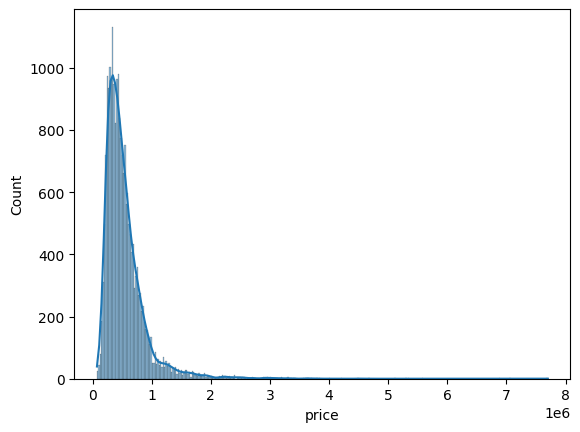

In [15]:
sns.histplot(x = target, data = df_housing, kde = True) #Vemos que mi target tiene una buena distribución

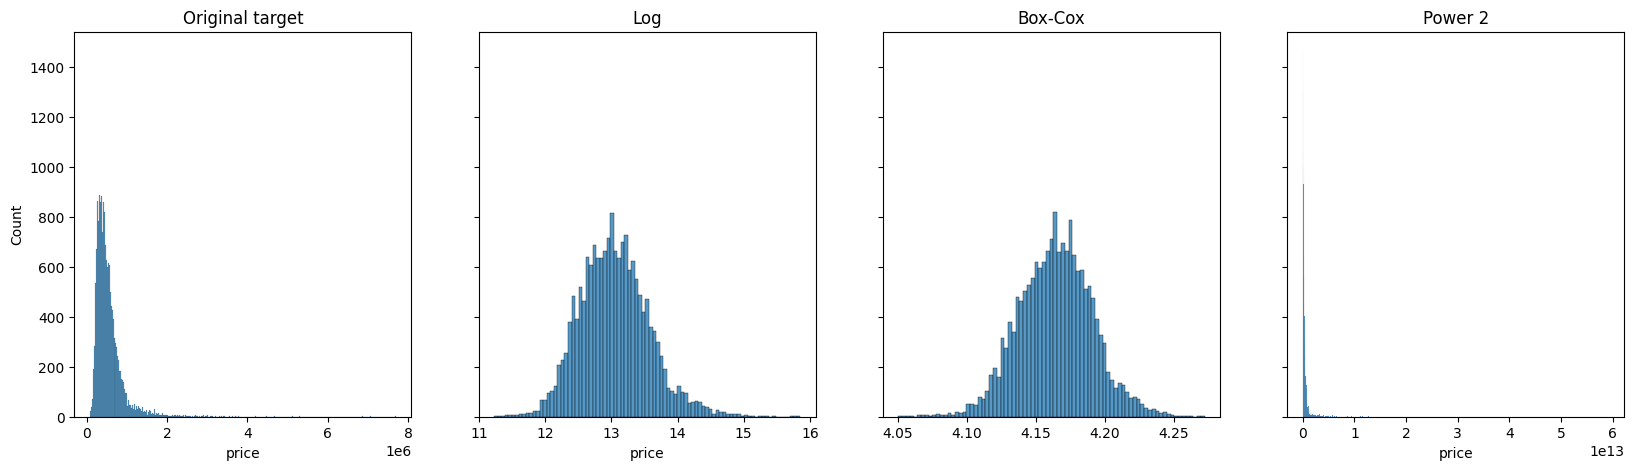

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
y_train = train_set.price

# Original target
sns.histplot(y_train, kde=False, ax=axes[0])
axes[0].set_title("Original target")

# Logaritmic
sns.histplot(np.log(y_train),kde=False, ax=axes[1])
axes[1].set_title("Log")

# Box-cox
sns.histplot(stats.boxcox(y_train)[0],kde=False, ax=axes[2])
axes[2].set_title("Box-Cox");

# Power 2
sns.histplot(np.power(y_train, 2),kde=False, ax=axes[3])
axes[3].set_title("Power 2");

## Revisión variables

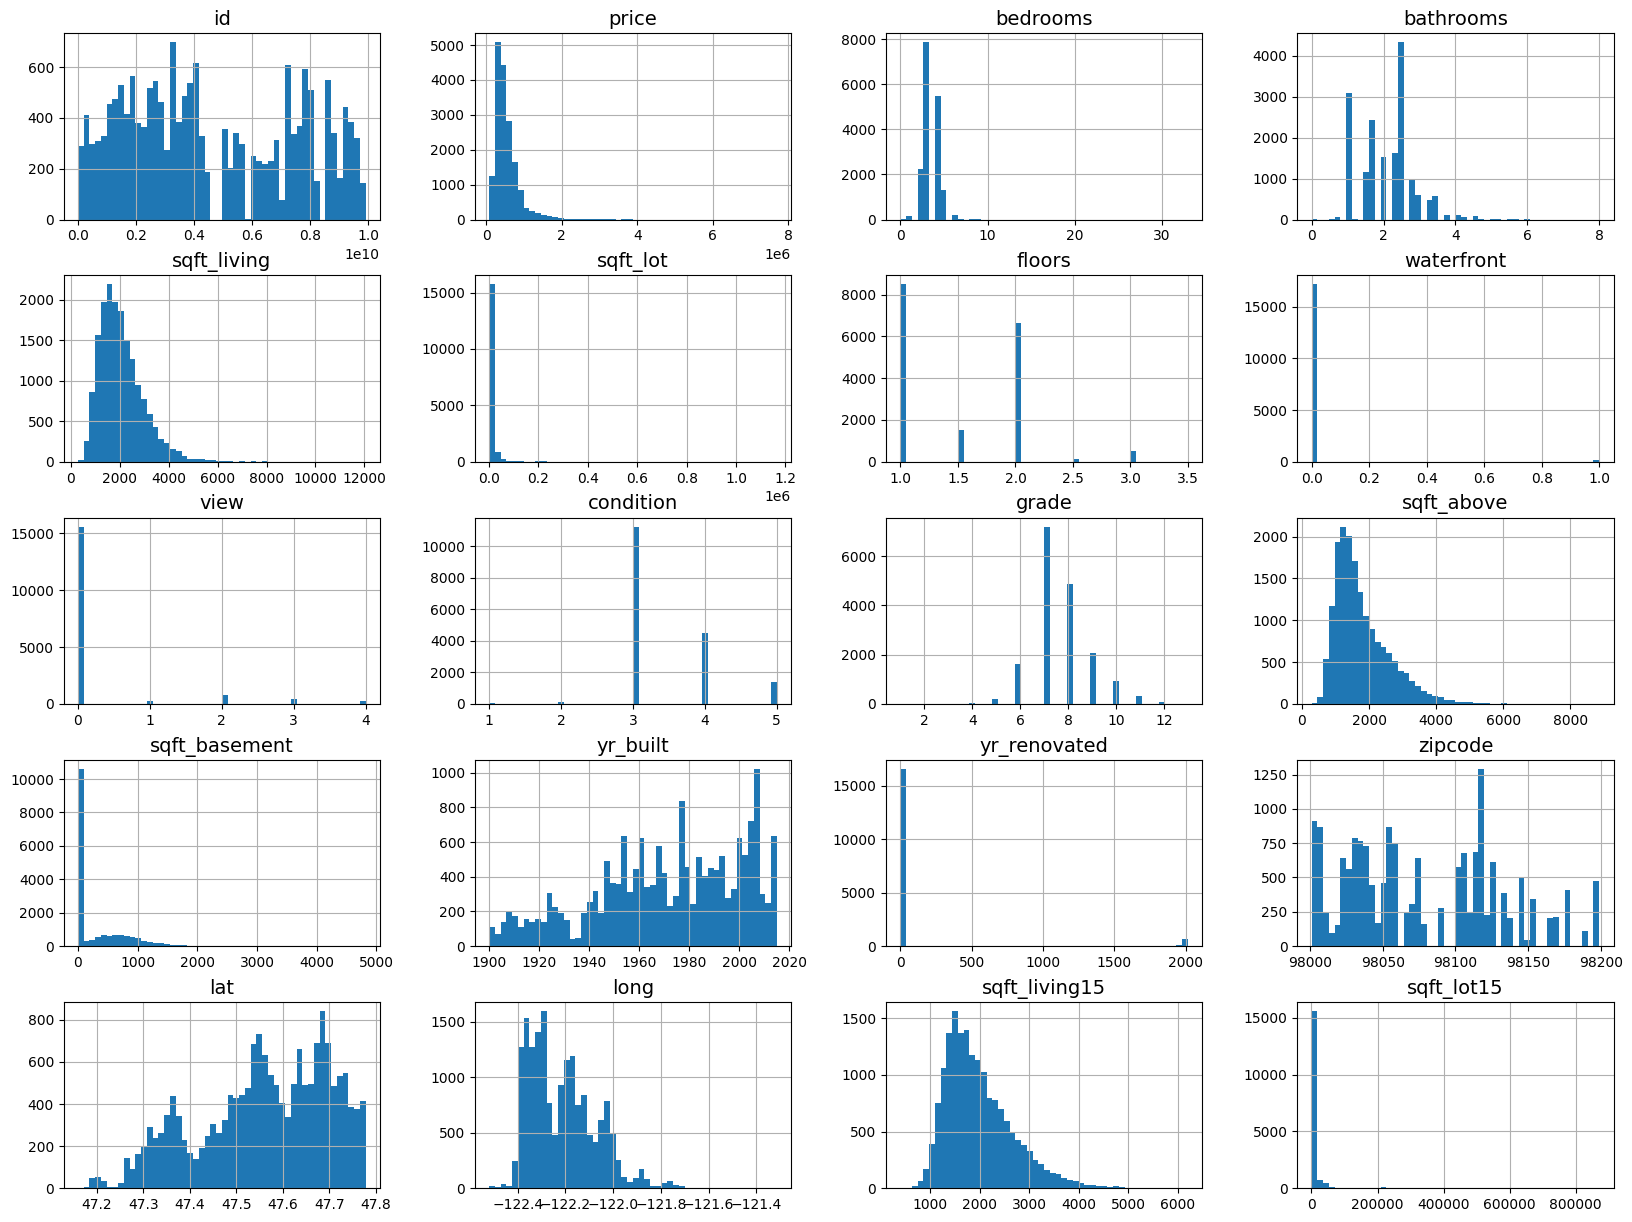

In [17]:

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_set.hist(bins=50, figsize=(20, 15)) 
plt.show()

In [18]:
def tipifica_variables(df, umbral_categoria=10, umbral_continua=0.90):

     # Asegúrate de que umbral_categoria es un entero
    try:
        umbral_categoria = int(umbral_categoria)
    except ValueError:
        print(f"Error: umbral_categoria debe ser un número, se recibió: {umbral_categoria}")
        return None

    # Inicializar una lista para almacenar el resultado
    sugerencias = []

    # Recorrer cada columna del DataFrame
    for col in df.columns:
        # Calcular la cardinalidad (número de valores únicos)
        cardinalidad = df[col].nunique()
        # Calcular el porcentaje de cardinalidad
        porcentaje_cardinalidad = (cardinalidad / len(df)) * 100
        
        # Determinar el tipo sugerido
        if cardinalidad == 2:
            tipo_sugerido = "Binaria"
        elif cardinalidad < umbral_categoria:
            tipo_sugerido = "Categórica"
        elif porcentaje_cardinalidad >= umbral_continua:
            tipo_sugerido = "Numerica Continua"
        else:
            tipo_sugerido = "Numerica Discreta"
        
        # Añadir la sugerencia a la lista
        sugerencias.append({
            'nombre_variable': col,
            'tipo_sugerido': tipo_sugerido
        })
    
    # Convertir la lista de sugerencias en un DataFrame
    resultado_df = pd.DataFrame(sugerencias)
    
    return resultado_df

In [19]:
tipifica_variables(train_set,10,0.90) #aunque grade la considera númerica discreta, la consideramos categórica ordinal

,nombre_variable,tipo_sugerido
0,id,Numerica Continua
1,date,Numerica Continua
2,price,Numerica Continua
3,bedrooms,Numerica Discreta
4,bathrooms,Numerica Discreta
5,sqft_living,Numerica Continua
6,sqft_lot,Numerica Continua
7,floors,Categórica
8,waterfront,Binaria
9,view,Categórica


    umbral_categoria : int, opcional (por defecto 10)
        El umbral de cardinalidad. Si una columna tiene menos valores únicos que este
        umbral, se considera categórica. Si tiene más, se considera numérica.

    umbral_continua : float, opcional (por defecto 0.90)
        Umbral de porcentaje de cardinalidad sobre el tamaño del DataFrame. Si el
        porcentaje de valores únicos en la columna es superior o igual a este umbral
        y la cardinalidad supera el umbral de categorías, la variable se considera 
        "Numérica Continua". En caso contrario, se considera "Numérica Discreta".

In [20]:
train_set.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.580770e+09,5.377686e+05,3.368074,2.113794,2073.894910,1.479895e+04,1.499161,0.007172,0.233025,3.407577,7.653846,1785.962175,287.932736,1971.108329,83.003412,98077.974378,47.560330,-122.214139,1982.904569,12725.059341
std,2.876748e+09,3.614635e+05,0.931439,0.766790,907.297963,3.883925e+04,0.542819,0.084385,0.761749,0.651698,1.170355,821.626290,438.727110,29.435603,398.503250,53.326084,0.138432,0.140498,681.232425,27525.258285
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123042e+09,3.201500e+05,3.000000,1.500000,1430.000000,5.001250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.472000,-122.329000,1480.000000,5083.000000
50%,3.905000e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7615.000000
75%,7.305301e+09,6.400000e+05,4.000000,2.500000,2540.000000,1.060675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,550.000000,1997.000000,0.000000,98117.000000,47.678000,-122.125000,2360.000000,10046.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


*Podemos ver que según la desviación estandár (std) nos dice que hay algunas de las variables con outliers potentes, por ejemplo, sqt_living, sqft_lot, grade, sqtf_above, sqft_basement, yr_built, yr_renovated, zipcode, sqft_living15 ysqft_lot15*

*Veo que hay outliers potentes en algunas variables (lo tendré que tener en cuenta si voy a estandarizar para hacer transformaciones primero)*

*Finalmente, veo que **grade** definitivamente es categoríca y no númerica*

### Correlación de Pearson

In [21]:
corr_matrix = train_set.corr(numeric_only= True)


In [22]:
corr_matrix #esta tabla ayuda a saber la correlación y también a identificar el porque se quita una variable por colinealidad

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.020624,0.005498,0.007884,-0.012012,-0.138542,0.018734,-0.007907,0.007141,-0.026997,0.010693,-0.007586,-0.010636,0.028904,-0.020093,-0.009239,-0.008769,0.021853,-0.003015,-0.142291
price,-0.020624,1.000000,0.308297,0.526616,0.701700,0.091039,0.253424,0.252946,0.392108,0.036343,0.665093,0.603255,0.321387,0.049099,0.127737,-0.053800,0.310770,0.023485,0.582666,0.079152
bedrooms,0.005498,0.308297,1.000000,0.515327,0.575076,0.031067,0.173009,-0.010038,0.070191,0.028222,0.353527,0.474404,0.300830,0.148849,0.020927,-0.152816,-0.013299,0.126022,0.386246,0.023640
bathrooms,0.007884,0.526616,0.515327,1.000000,0.752745,0.086344,0.504126,0.063145,0.179657,-0.124764,0.664407,0.683303,0.277038,0.505649,0.051332,-0.202922,0.026761,0.221848,0.563438,0.079958
sqft_living,-0.012012,0.701700,0.575076,0.752745,1.000000,0.176264,0.348917,0.095543,0.275554,-0.056163,0.760652,0.875820,0.427831,0.315848,0.054880,-0.203540,0.053920,0.242701,0.754904,0.174895
sqft_lot,-0.138542,0.091039,0.031067,0.086344,0.176264,1.000000,-0.004670,0.027354,0.061524,-0.010531,0.116535,0.187159,0.014017,0.051956,0.015425,-0.135121,-0.078886,0.240164,0.151801,0.734932
floors,0.018734,0.253424,0.173009,0.504126,0.348917,-0.004670,1.000000,0.018441,0.027260,-0.268652,0.457274,0.518214,-0.248916,0.495168,0.005480,-0.054722,0.054014,0.121500,0.271551,-0.012202
waterfront,-0.007907,0.252946,-0.010038,0.063145,0.095543,0.027354,0.018441,1.000000,0.390616,0.017313,0.070820,0.063283,0.079072,-0.030817,0.088378,0.026815,-0.018784,-0.043843,0.075609,0.032785
view,0.007141,0.392108,0.070191,0.179657,0.275554,0.061524,0.027260,0.390616,1.000000,0.048571,0.244440,0.159612,0.270938,-0.058776,0.100026,0.084540,0.005750,-0.086336,0.276378,0.063760
condition,-0.026997,0.036343,0.028222,-0.124764,-0.056163,-0.010531,-0.268652,0.017313,0.048571,1.000000,-0.143680,-0.158199,0.180120,-0.361492,-0.061802,0.003919,-0.018660,-0.109123,-0.094194,-0.006322


In [23]:
serie_corr = np.abs(corr_matrix[target]).sort_values(ascending=False) #Vemos que las últimas 5 variables las podemos eliminar, ya que no son mayores a 0.07

serie_corr

price            1.000000
sqft_living      0.701700
grade            0.665093
sqft_above       0.603255
sqft_living15    0.582666
bathrooms        0.526616
view             0.392108
sqft_basement    0.321387
lat              0.310770
bedrooms         0.308297
floors           0.253424
waterfront       0.252946
yr_renovated     0.127737
sqft_lot         0.091039
sqft_lot15       0.079152
zipcode          0.053800
yr_built         0.049099
condition        0.036343
long             0.023485
id               0.020624
Name: price, dtype: float64

In [24]:
criterio = 0.09
features_num = serie_corr[serie_corr > criterio].index.to_list() #condition no se excluye a pesar de ser categórica, ya que ya lo elimine con el criterio
                                                                 #incluimos a view dentro de las variables númericas ya que al realizar el análisis de la variable, me di cuenta que si se clasifica categórica tiene una proporción bastante desbalanceada
features_num.remove(target)
features_num.remove("grade") #categórica
features_num.remove("waterfront") #categórica
#Estas 4  de abajo también las vamos a tratar como categórias ya que a pesar de ser consideradas númericas discretas, podemos convertirlas a categóricas y de ahi determinar las ordinales o bien, crear agrupaciones

features_num.remove("bathrooms") #categórica
features_num.remove("bedrooms") #categórica
features_num.remove("yr_renovated") #categórica
features_num.remove("floors") #categórica



In [25]:
X_train.floors.unique() #observamos que floors lo podemos clasificar como categórica


array([1. , 1.5, 2. , 2.5, 3. , 3.5])

In [26]:
X_train.bathrooms.unique() #observamos que floors lo podemos clasificar como categórica


array([1.75, 1.  , 2.25, 2.5 , 2.75, 3.  , 2.  , 3.25, 1.5 , 4.  , 3.5 ,
       4.5 , 3.75, 0.5 , 5.5 , 4.75, 0.75, 5.25, 6.  , 4.25, 0.  , 1.25,
       5.  , 6.25, 7.75, 8.  , 5.75, 6.75, 6.5 ])

In [27]:
X_train.bedrooms.unique() #observamos que floors lo podemos clasificar como categórica


array([ 3,  2,  5,  4,  1,  6,  7,  0,  9,  8, 33, 10], dtype=int64)

In [28]:
X_train.yr_renovated.unique() #observamos que floors lo podemos clasificar como categórica y a lo mejor agrupar y luego hacer un ordinal encoder

array([   0, 2015, 2014, 2004, 1997, 1999, 2001, 2003, 2006, 1993, 2013,
       2007, 2005, 1992, 1974, 1984, 1975, 2002, 2009, 1953, 1982, 1979,
       2000, 2012, 1985, 2008, 2010, 1991, 1990, 1987, 1994, 1963, 1983,
       1995, 1969, 1986, 1968, 1989, 1996, 2011, 1998, 1980, 1955, 1973,
       1940, 1970, 1971, 1977, 1988, 1957, 1981, 1976, 1960, 1967, 1962,
       1958, 1978, 1946, 1945, 1944, 1972, 1959, 1964, 1965, 1950, 1934,
       1951, 1948, 1954, 1956], dtype=int64)

In [29]:
features_num

['sqft_living',
 'sqft_above',
 'sqft_living15',
 'view',
 'sqft_basement',
 'lat',
 'sqft_lot']

In [30]:
#columnas = corr_matrix["price"][corr_matrix["price"] > 0.09].index.to_list()

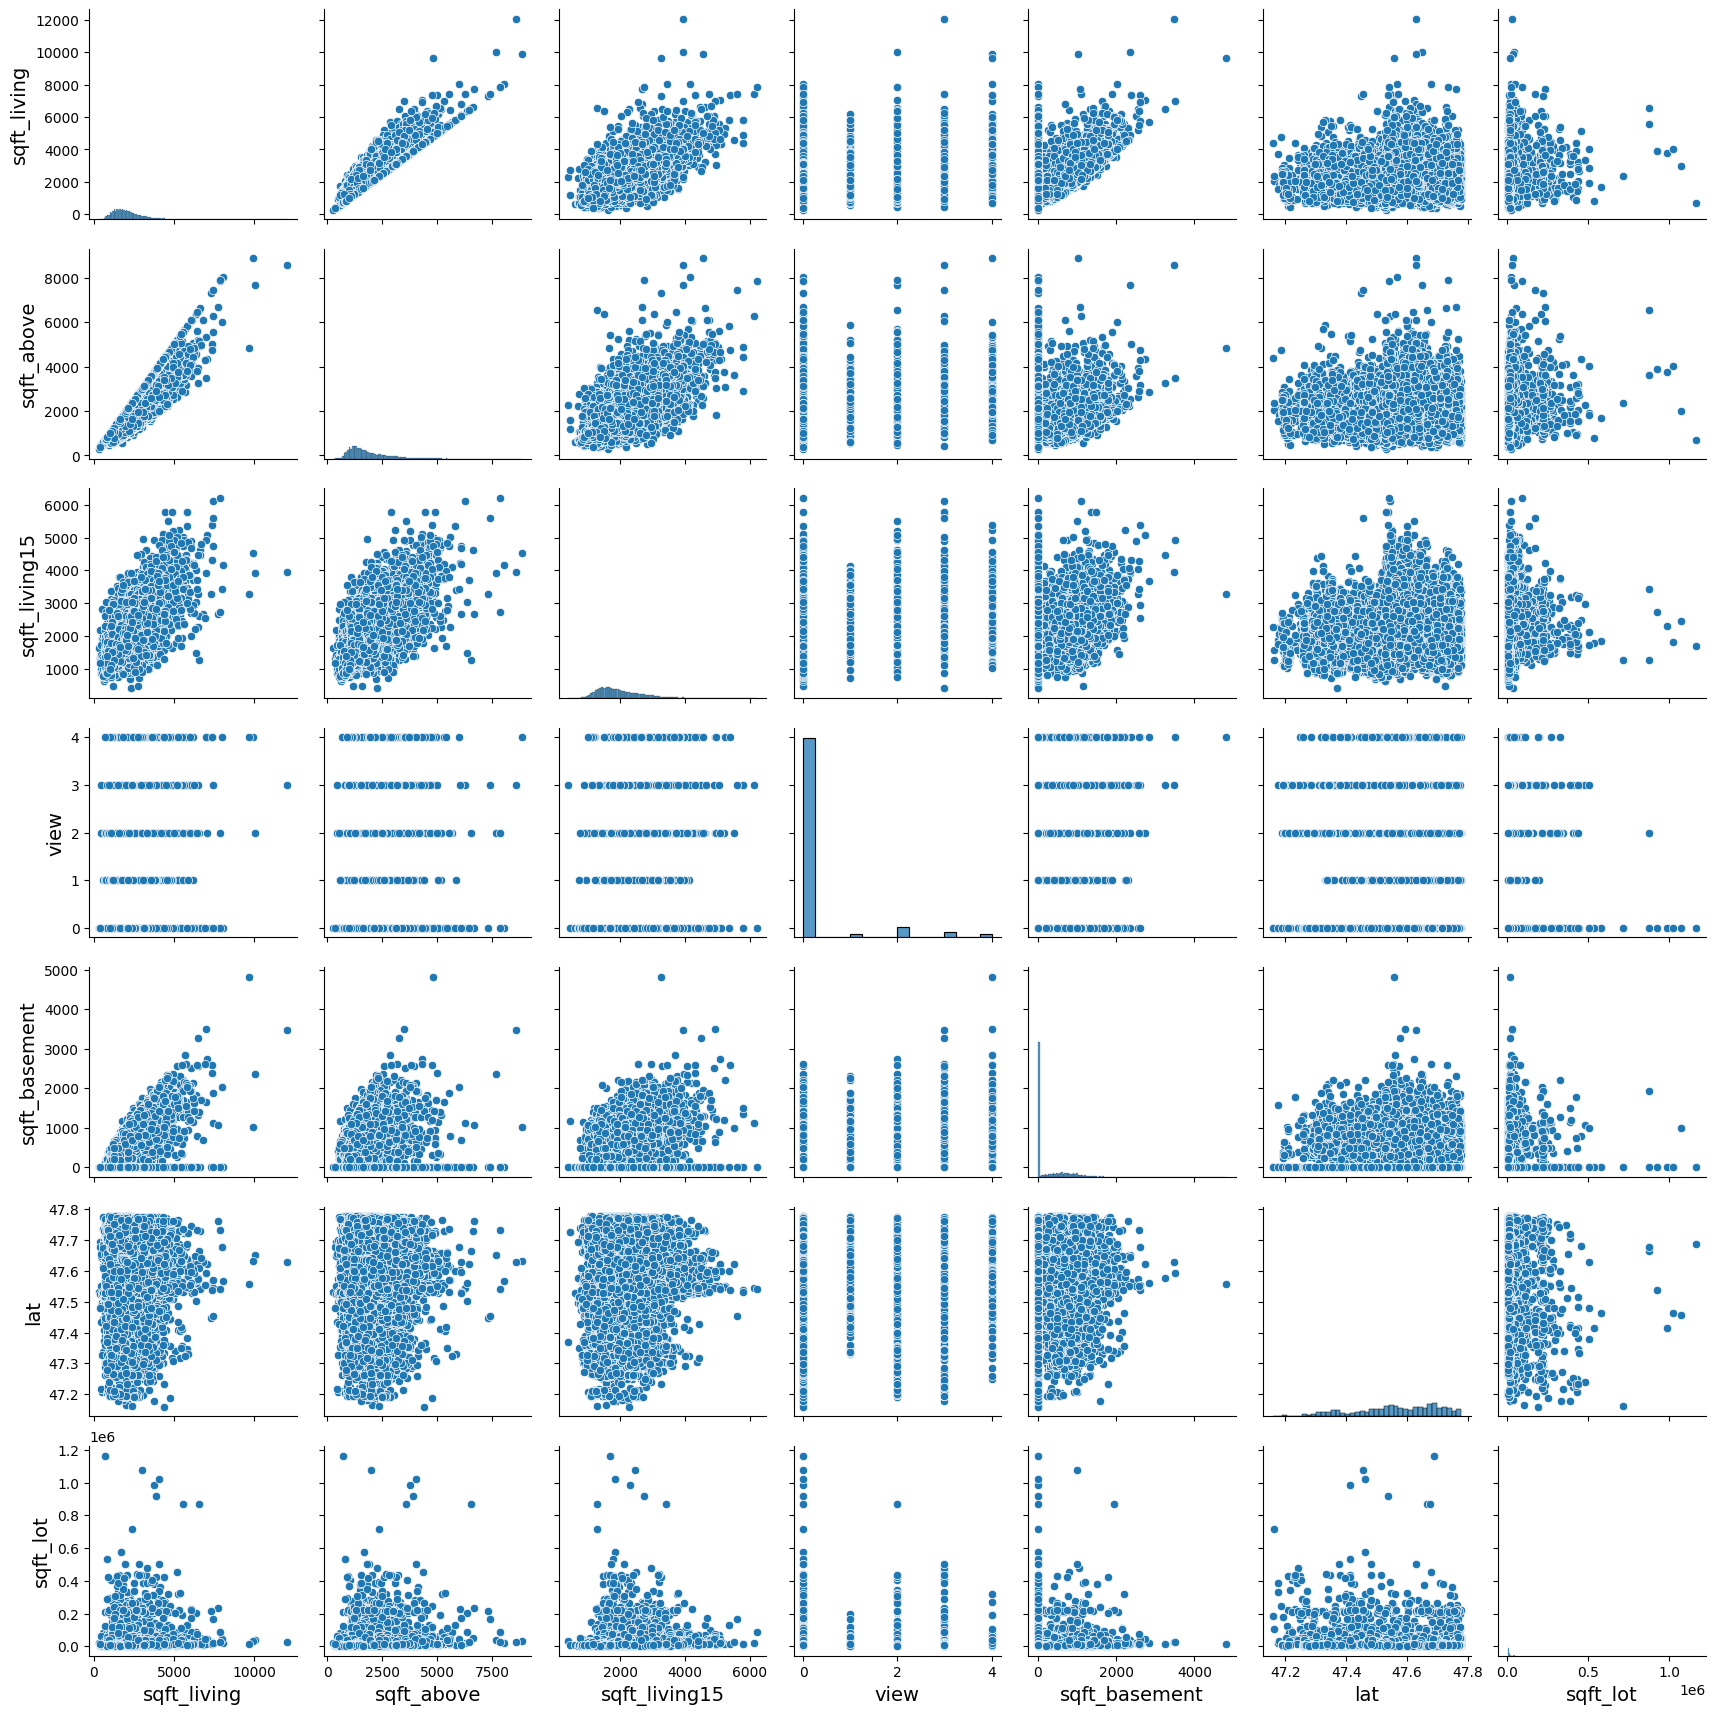

In [31]:
sns.pairplot(train_set[features_num]);

### Comprobación de colinealidad

In [32]:
criterio_col = 0.7 #Se pone 0.7 que se considera una correlación grande (este es un valor típico definido)
excluidas = []
for col in features_num:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr_matrix[col].items():
            print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                else:
                    print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            else:
                print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))

Voy a comprobar la colinealidad con sqft_living
Comprobando con id
No estaba ya en la lista original, no hago nada
Comprobando con price
No estaba ya en la lista original, no hago nada
Comprobando con bedrooms
No estaba ya en la lista original, no hago nada
Comprobando con bathrooms
No estaba ya en la lista original, no hago nada
Comprobando con sqft_living
soy yo misma, no me excluyo
Comprobando con sqft_lot
Conmigo no tiene problema, dejo a sqft_lot tranquila
Comprobando con floors
No estaba ya en la lista original, no hago nada
Comprobando con waterfront
No estaba ya en la lista original, no hago nada
Comprobando con view
Conmigo no tiene problema, dejo a view tranquila
Comprobando con condition
No estaba ya en la lista original, no hago nada
Comprobando con grade
No estaba ya en la lista original, no hago nada
Comprobando con sqft_above
Correlo al 0.8758203818944853, por eso excluyo a sqft_above
Comprobando con sqft_basement
Conmigo no tiene problema, dejo a sqft_basement tranquila

In [33]:
for excluida in excluidas:
    features_num.remove(excluida)
features_num

['sqft_living', 'view', 'sqft_basement', 'lat', 'sqft_lot']

In [34]:
excluidas #dejamos estas excluidas ya que observamos que no tienen alta correlación con el target

['sqft_living15', 'sqft_above']

<Axes: >

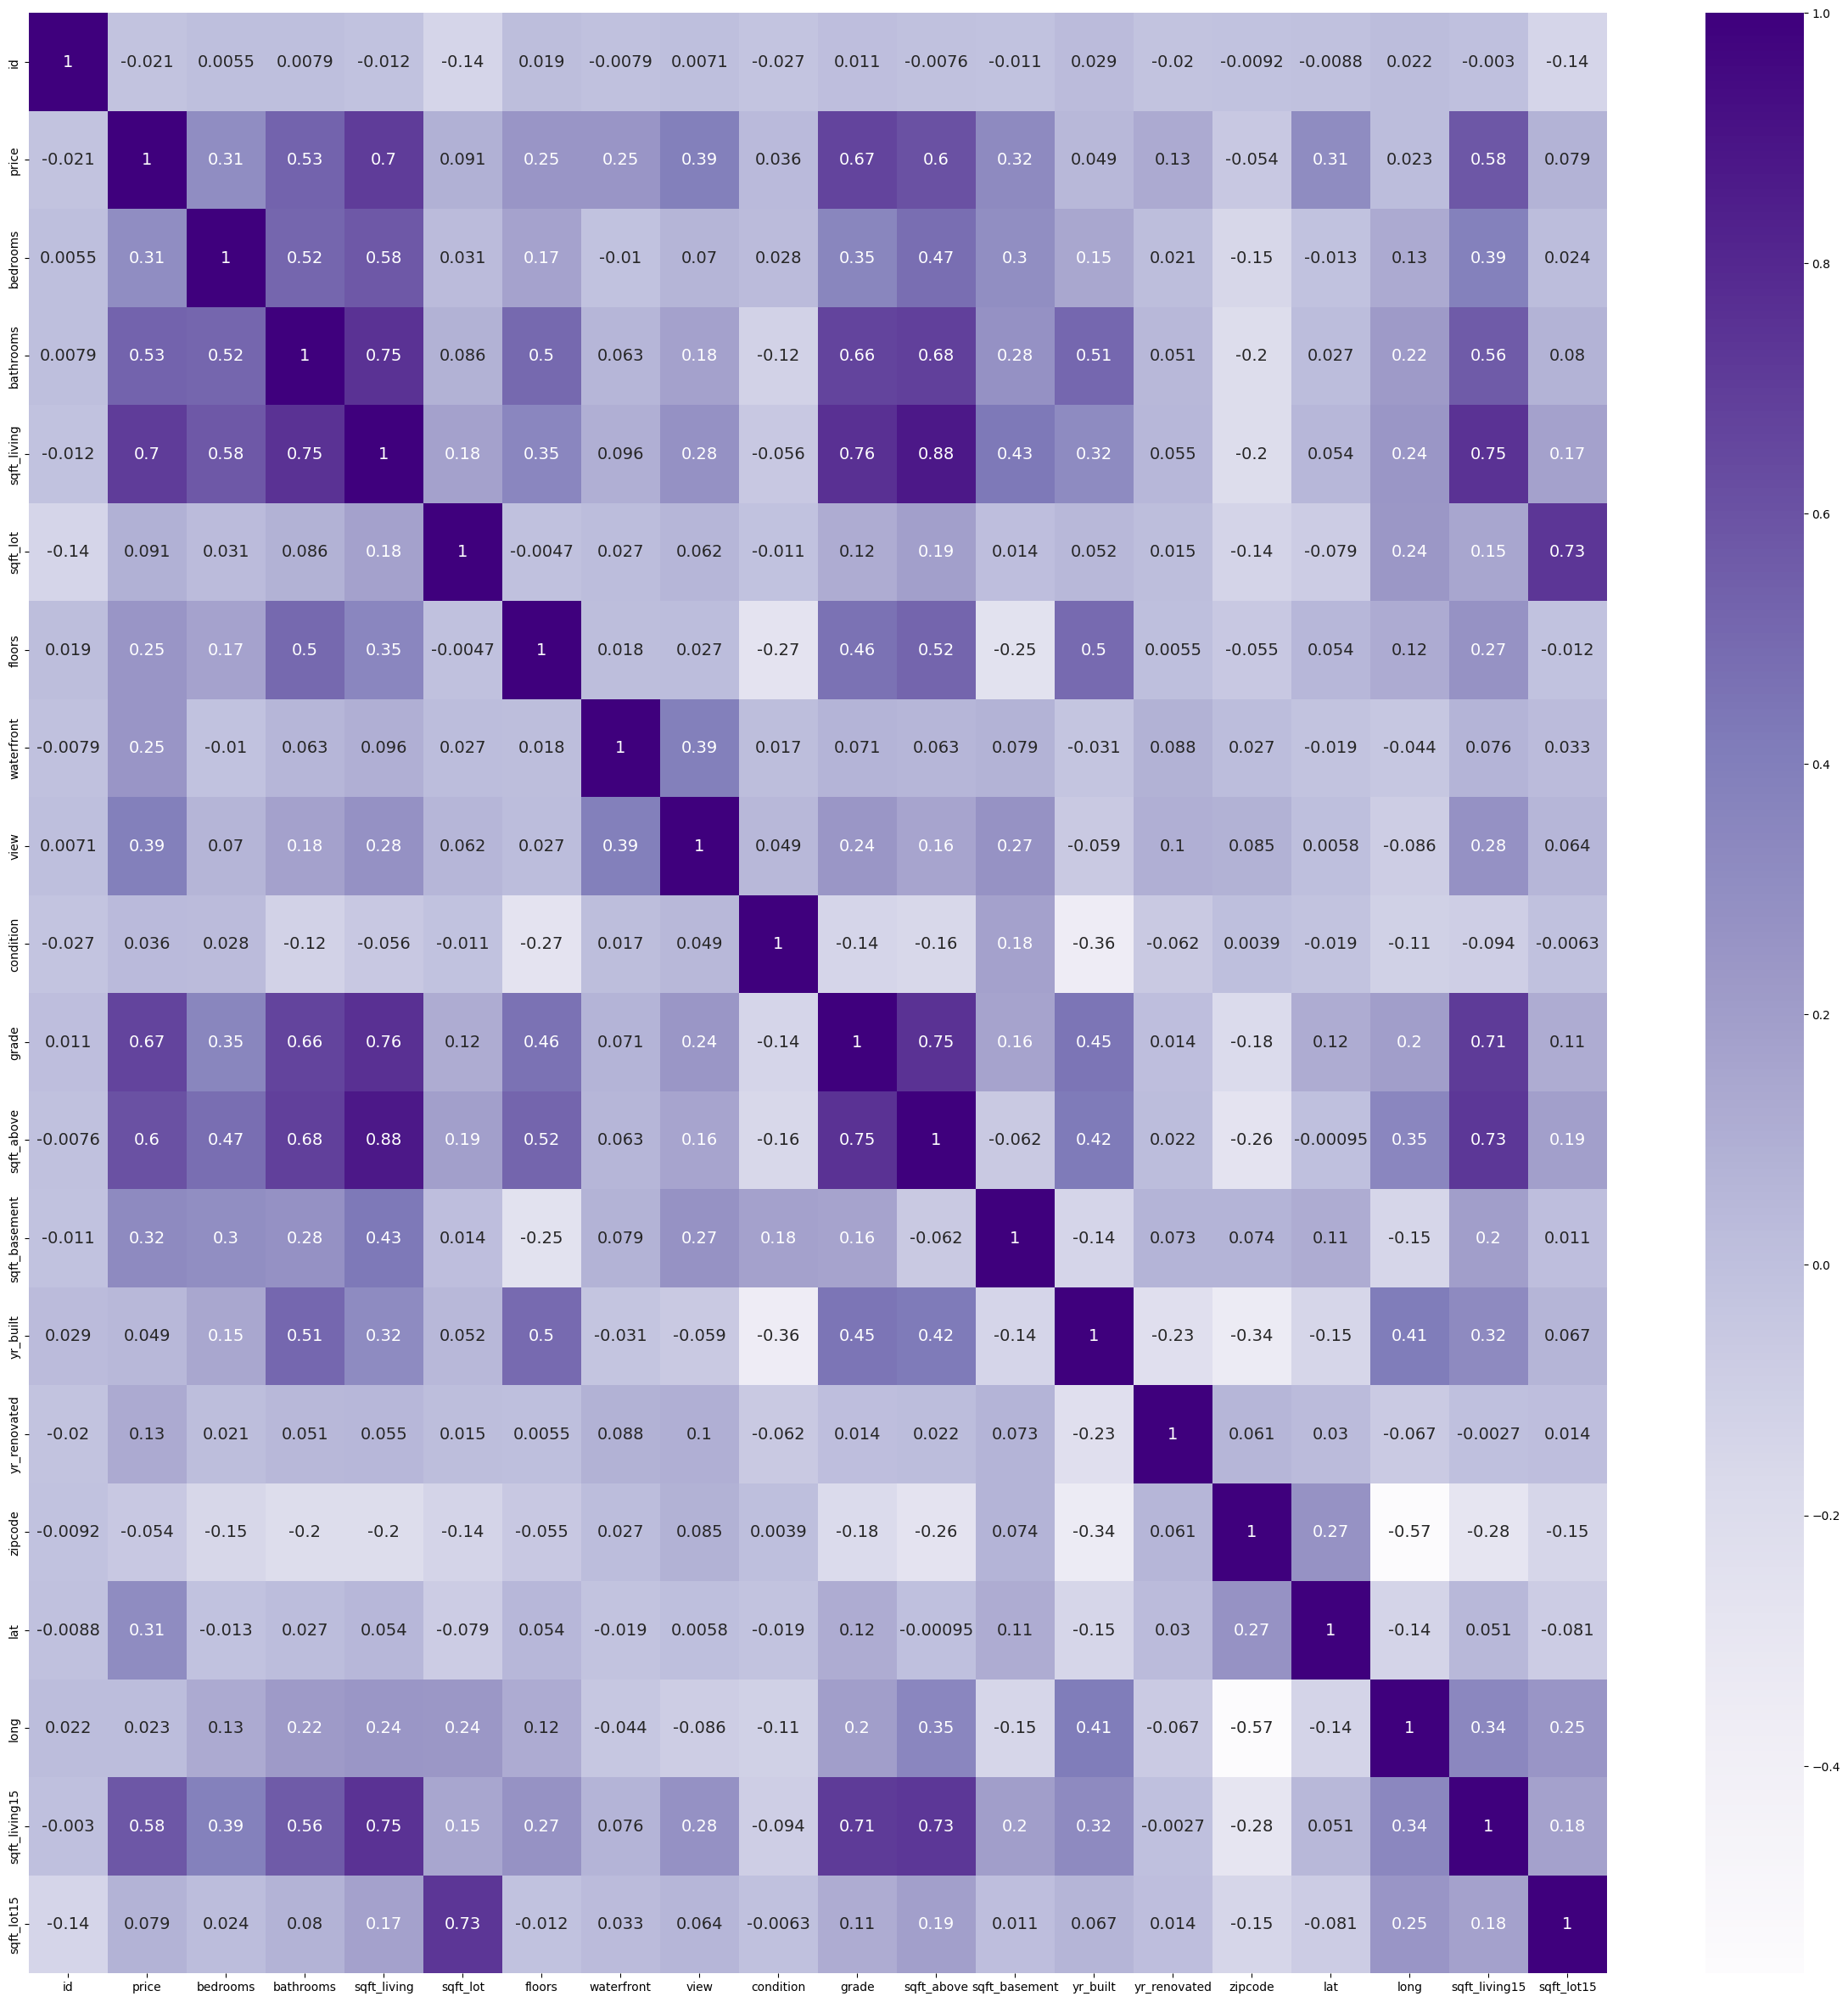

In [35]:
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix,annot=True,cmap="Purples")

### Determinación de variables categóricas y su influencia en la predicción

In [36]:
features_cat = ["floors","condition","grade","waterfront","yr_renovated","bathrooms","bedrooms"]


In [37]:
train_set.yr_renovated.value_counts()

yr_renovated
0       16571
2014       76
2005       32
2000       30
2003       29
        ...  
1934        1
1951        1
1948        1
1954        1
1956        1
Name: count, Length: 70, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

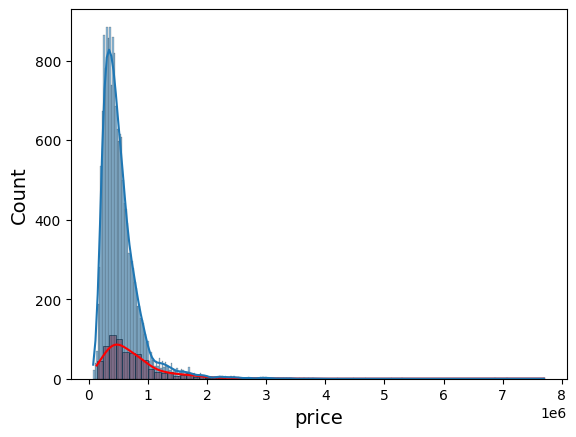

In [38]:
sns.histplot(x= target, data = train_set[train_set.yr_renovated > 1], kde = True, color = "red") #vemos que esta categorica me sirve
sns.histplot(x= target, data = train_set[train_set.yr_renovated != 1], kde = True)

In [39]:
train_set.bedrooms.value_counts()

bedrooms
3     7864
4     5477
2     2238
5     1292
6      212
1      153
7       29
8        9
0        8
9        5
10       2
33       1
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

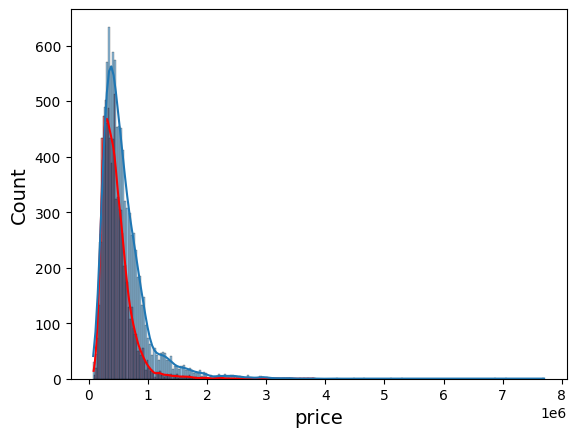

In [40]:
sns.histplot(x= target, data = train_set[train_set.bedrooms == 3], kde = True, color = "red") #vemos que esta categorica me sirve
sns.histplot(x= target, data = train_set[train_set.bedrooms != 3], kde = True)

In [41]:
train_set.bathrooms.value_counts()

bathrooms
2.50    4333
1.00    3088
1.75    2425
2.25    1621
2.00    1526
1.50    1172
2.75     963
3.00     594
3.50     577
3.25     477
3.75     121
4.00     111
4.50      84
4.25      60
0.75      54
4.75      18
5.00      17
5.25      12
1.25       8
0.00       7
5.50       7
6.00       4
0.50       4
5.75       2
6.25       1
7.75       1
8.00       1
6.75       1
6.50       1
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

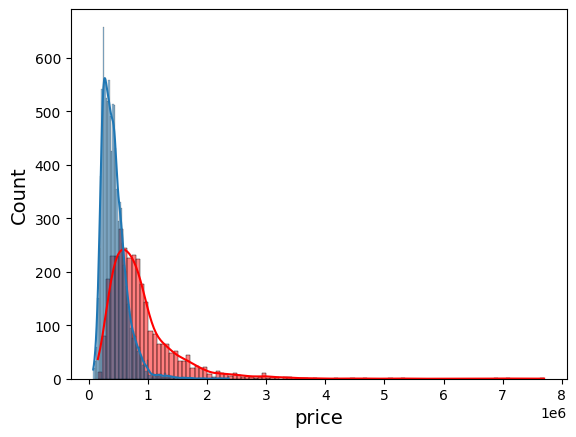

In [42]:
sns.histplot(x= target, data = train_set[train_set.bathrooms > 2.5], kde = True, color = "red") #vemos que esta categorica me sirve
sns.histplot(x= target, data = train_set[train_set.bathrooms < 2.5], kde = True)

In [43]:
train_set.floors.value_counts(normalize=True)

floors
1.0    0.490920
2.0    0.383343
1.5    0.088086
3.0    0.029902
2.5    0.007403
3.5    0.000347
Name: proportion, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

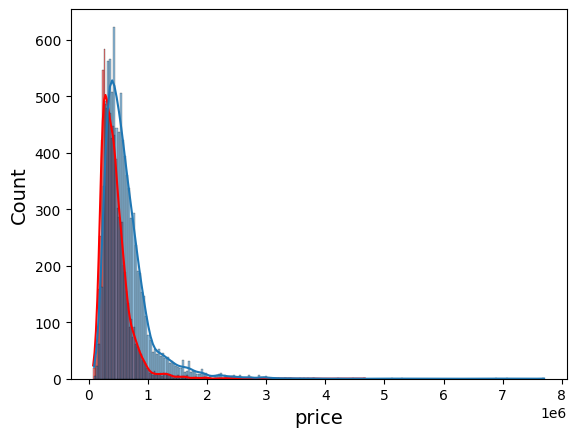

In [44]:
sns.histplot(x= target, data = train_set[train_set.floors == 1], kde = True, color = "red") #vemos que esta categorica me sirve
sns.histplot(x= target, data = train_set[train_set.floors != 1], kde = True)

In [45]:
train_set.condition.value_counts(normalize=True)

condition
3    0.650549
4    0.260960
5    0.078890
2    0.008039
1    0.001562
Name: proportion, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

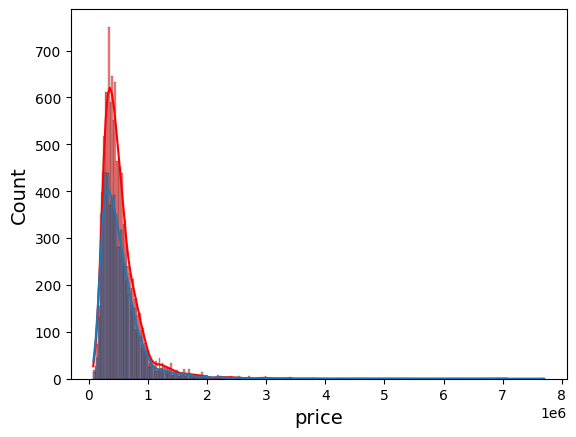

In [46]:
sns.histplot(x= target, data = train_set[train_set.condition == 3], kde = True, color = "red") #vemos que esta categorica me sirve poco
sns.histplot(x= target, data = train_set[train_set.condition != 3], kde = True)

In [47]:
train_set.grade.value_counts(normalize=True)

grade
7     0.416484
8     0.282186
9     0.119838
6     0.093696
10    0.052921
11    0.017698
5     0.010873
12    0.003991
4     0.001504
13    0.000578
3     0.000174
1     0.000058
Name: proportion, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

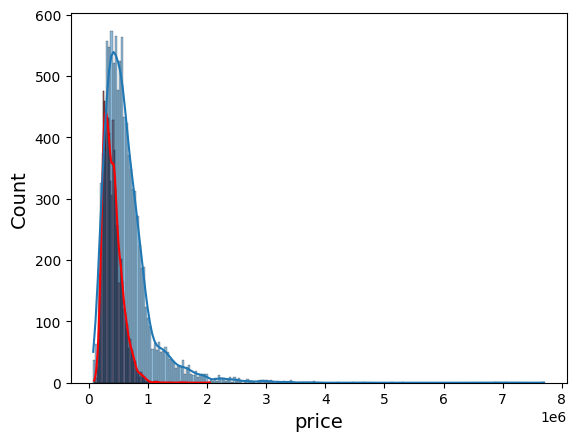

In [48]:
sns.histplot(x= target, data = train_set[train_set.grade == 7], kde = True, color = "red") #vemos que esta categorica me sirve 
sns.histplot(x= target, data = train_set[train_set.grade != 7], kde = True)

In [49]:
train_set.waterfront.value_counts(normalize=True)

waterfront
0    0.992828
1    0.007172
Name: proportion, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

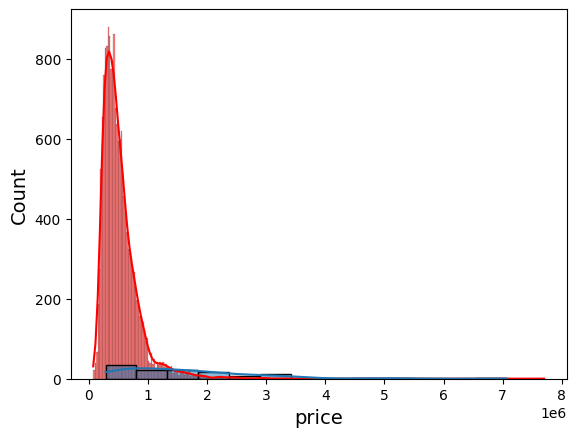

In [50]:
sns.histplot(x= target, data = train_set[train_set.waterfront == 0], kde = True, color = "red") #vemos que esta categorica me sirve 
sns.histplot(x= target, data = train_set[train_set.waterfront == 1], kde = True)

In [51]:
features_cat = ["floors","condition","grade","waterfront","yr_renovated","bathrooms","bedrooms"] #de momento utilizaré todas las variables categóricas, auqnue condition de momento parece no muy útil

### TRANSFORMACIÓN DE VARIABLES CATEGÓRICAS

#### Ordinal Encoding

##### Floors

In [52]:
features_cat

['floors',
 'condition',
 'grade',
 'waterfront',
 'yr_renovated',
 'bathrooms',
 'bedrooms']

In [53]:
train_set["floors"].value_counts() #Miramos cuantos cantidad de valores que hay por categoría

floors
1.0    8488
2.0    6628
1.5    1523
3.0     517
2.5     128
3.5       6
Name: count, dtype: int64

In [54]:
floor_mapping = [
    train_set["floors"] > 2,
    (train_set["floors"] > 1) & (train_set["floors"] <= 2),
    train_set["floors"] <= 1
]# transformarmos los números a letras para una mejor visulazación utilizando el ordinal enconder.

In [55]:
floor_category_mapping = ["A","B","C"]

In [56]:
train_set["floors_category"] = np.select(floor_mapping, floor_category_mapping, default="C") 

In [57]:
train_set[["floors_category","floors"]].value_counts() #Vemos que proporcionalmente hemos logrado acomodar y agrupar las clasificaciones para que proporcionalmente haya un balance mejor entre clasificaciones 

floors_category  floors
C                1.0       8488
B                2.0       6628
                 1.5       1523
A                3.0        517
                 2.5        128
                 3.5          6
Name: count, dtype: int64

In [58]:
train_set[["floors_category"]].value_counts()#Miramos cuantos cantidad de valores que hay por categoría

floors_category
C                  8488
B                  8151
A                   651
Name: count, dtype: int64

In [59]:
categories = [["A", "B", "C"]] # se ordena por órden de relevancia, a mayor pisos, más caro
ordinal_encoder = OrdinalEncoder(categories= categories)
train_set["ordinal_floors"] = ordinal_encoder.fit_transform(train_set[["floors_category"]]) 


In [60]:
train_set[["ordinal_floors","floors_category","floors"]].sample(10) #miramos los resultados y si hacen setido con lo esperado

,ordinal_floors,floors_category,floors
10632,1.0,B,1.5
17281,1.0,B,1.5
21039,1.0,B,2.0
2048,2.0,C,1.0
14883,2.0,C,1.0
8106,2.0,C,1.0
21329,0.0,A,3.0
7551,2.0,C,1.0
7701,2.0,C,1.0
11374,1.0,B,2.0


##### Bedrooms

In [61]:
train_set["bedrooms"].value_counts() #Miramos cuantos cantidad de valores que hay por categoría

bedrooms
3     7864
4     5477
2     2238
5     1292
6      212
1      153
7       29
8        9
0        8
9        5
10       2
33       1
Name: count, dtype: int64

In [62]:
bedrooms_mapping = [
    train_set["bedrooms"] > 5,
    (train_set["bedrooms"] > 4) & (train_set["bedrooms"] <= 5),
    (train_set["bedrooms"] > 3) & (train_set["bedrooms"] <= 4),
    (train_set["bedrooms"] > 2) & (train_set["bedrooms"] <= 3),
    (train_set["bedrooms"] <= 2)
    
]# transformarmos los números a letras para una mejor visulazación utilizando el ordinal enconder.

In [63]:
bedrooms_category_mapping = ["A","B","C","D","E"] #Definimos las categorías

In [64]:
train_set["bedrooms_category"] = np.select(bedrooms_mapping, bedrooms_category_mapping, default="E") 

In [65]:
train_set[["bedrooms_category","bedrooms"]].value_counts(sort = False) #Miramos cuantos cantidad de valores que hay por categoría

bedrooms_category  bedrooms
A                  6            212
                   7             29
                   8              9
                   9              5
                   10             2
                   33             1
B                  5           1292
C                  4           5477
D                  3           7864
E                  0              8
                   1            153
                   2           2238
Name: count, dtype: int64

In [66]:
train_set[["bedrooms_category"]].value_counts(sort=False) #Miramos cuantos valores únicos hay y observamos que el modelo nos predecirá mejor los valores de en medio debid a que la categoría A tiene menos datos por lo que podemos considerarlos como outliers
                                                        #Si observamos también podemos ver que lo común es que de bedrooms haya entre 2 a 5 cuartos por casa

bedrooms_category
A                     258
B                    1292
C                    5477
D                    7864
E                    2399
Name: count, dtype: int64

In [67]:
categories = [["A", "B", "C", "D", "E"]] # se ordena por órden de relevancia, a mayor pisos, más caro
ordinal_encoder = OrdinalEncoder(categories= categories)
train_set["ordinal_bedrooms"] = ordinal_encoder.fit_transform(train_set[["bedrooms_category"]]) 


In [68]:
train_set[["ordinal_bedrooms","bedrooms_category","bedrooms"]].sample(10) #miramos los resultados

,ordinal_bedrooms,bedrooms_category,bedrooms
10388,2.0,C,4
18032,3.0,D,3
13377,0.0,A,6
11657,3.0,D,3
20340,2.0,C,4
10916,2.0,C,4
5495,2.0,C,4
12313,3.0,D,3
20602,2.0,C,4
6577,3.0,D,3


##### Condition

In [69]:
train_set["condition"].value_counts() #Miramos cuantos cantidad de valores que hay por categoría

condition
3    11248
4     4512
5     1364
2      139
1       27
Name: count, dtype: int64

In [70]:
condition_mapping = [
    train_set["condition"] > 3,
    train_set["condition"] <= 3
    
]# transformarmos los números a letras para una mejor visulazación utilizando el ordinal enconder.

In [71]:
condition_category_mapping = ["Malo","Bueno"] #Definimos las categorías

In [72]:
train_set["condition_category"] = np.select(condition_mapping, condition_category_mapping, default="B") 

In [73]:
train_set[["condition_category","condition"]].value_counts(sort = False) #Miramos cuantos cantidad de valores que hay por categoría

condition_category  condition
Bueno               1               27
                    2              139
                    3            11248
Malo                4             4512
                    5             1364
Name: count, dtype: int64

In [74]:
train_set[["condition_category"]].value_counts(sort=False) #Miramos cuantos valores únicos hay y observamos que el modelo nos predecirá mejor los valores de en medio debid a que la categoría A tiene menos datos por lo que podemos considerarlos como outliers


condition_category
Bueno                 11414
Malo                   5876
Name: count, dtype: int64

In [75]:
categories = [["Bueno", "Malo"]] # se ordena por órden de relevancia, a mayor pisos, más caro
ordinal_encoder = OrdinalEncoder(categories= categories)
train_set["ordinal_condition"] = ordinal_encoder.fit_transform(train_set[["condition_category"]]) 

In [76]:
train_set[["ordinal_condition","condition_category","condition"]].sample(10) #miramos los resultados

,ordinal_condition,condition_category,condition
7701,1.0,Malo,4
4980,0.0,Bueno,3
1440,0.0,Bueno,3
16363,0.0,Bueno,3
6713,1.0,Malo,5
3998,1.0,Malo,4
9658,0.0,Bueno,3
526,0.0,Bueno,3
13548,0.0,Bueno,3
16292,0.0,Bueno,3


Grade

In [77]:
train_set["grade"].value_counts().sort_index() #Miramos cuantos valores únicos hay

grade
1        1
3        3
4       26
5      188
6     1620
7     7201
8     4879
9     2072
10     915
11     306
12      69
13      10
Name: count, dtype: int64

In [78]:
grade_mapping = [
    train_set["grade"] > 10,
    (train_set["grade"] > 7) & (train_set["grade"] <= 10),
    (train_set["grade"] > 4) & (train_set["grade"] <= 7),
    (train_set["grade"] <= 4)
    
]# transformarmos los números a letras para una mejor visulazación utilizando el ordinal enconder.

In [79]:
grade_category_mapping = ["Malo","Normal","Bueno","Muy bueno"] #Definimos las categorías

In [80]:
train_set["grade_category"] = np.select(grade_mapping, grade_category_mapping, default="Malo") 

In [81]:
train_set[["grade_category","grade"]].value_counts(sort = False) #Miramos cuantos cantidad de valores que hay por categoría

grade_category  grade
Bueno           5         188
                6        1620
                7        7201
Malo            11        306
                12         69
                13         10
Muy bueno       1           1
                3           3
                4          26
Normal          8        4879
                9        2072
                10        915
Name: count, dtype: int64

In [82]:
train_set[["grade_category"]].value_counts() #Miramos cuantos valores hay y observamos que el modelo no predecirá muy bien los outliers de la categoría Muy Bueno y si predecirá mejor los valores de Normal

grade_category
Bueno             9009
Normal            7866
Malo               385
Muy bueno           30
Name: count, dtype: int64

In [83]:
categories = [["Muy bueno","Bueno","Normal", "Malo"]] # se ordena por órden de relevancia, a mayor pisos, más caro
ordinal_encoder = OrdinalEncoder(categories= categories)
train_set["ordinal_grade"] = ordinal_encoder.fit_transform(train_set[["grade_category"]]) 

In [84]:
train_set[["ordinal_grade","grade_category","grade"]].sample(10) #miramos los resultados

,ordinal_grade,grade_category,grade
19375,1.0,Bueno,6
5004,2.0,Normal,8
5258,1.0,Bueno,7
11754,1.0,Bueno,6
10922,1.0,Bueno,7
20318,2.0,Normal,8
2611,1.0,Bueno,7
21547,2.0,Normal,8
17933,1.0,Bueno,7
19367,1.0,Bueno,7


##### Waterfront  & Yr_renovated
 
Watefront y Yr_renovated son descartadas para utilizarse como variables categórica y númericas, ya que al hacer el análisis, la proporción de datos entre los que tenían vista y los que no esta 80/20 por lo que la excluímos

In [85]:
train_set["waterfront"].value_counts() #Miramos cuantos valores únicos hay

waterfront
0    17166
1      124
Name: count, dtype: int64

In [86]:
train_set["yr_renovated"].value_counts() #Miramos cuantos valores únicos hay

yr_renovated
0       16571
2014       76
2005       32
2000       30
2003       29
        ...  
1934        1
1951        1
1948        1
1954        1
1956        1
Name: count, Length: 70, dtype: int64

In [87]:
features_cat

['floors',
 'condition',
 'grade',
 'waterfront',
 'yr_renovated',
 'bathrooms',
 'bedrooms']

In [88]:
features_cat = [['floors',
 'condition',
 'grade',
 'bathrooms',
 'bedrooms']]

##### Bathrooms

In [89]:
train_set["bathrooms"].value_counts().sort_index() #Miramos cuantos valores hay en cada clasificación

bathrooms
0.00       7
0.50       4
0.75      54
1.00    3088
1.25       8
1.50    1172
1.75    2425
2.00    1526
2.25    1621
2.50    4333
2.75     963
3.00     594
3.25     477
3.50     577
3.75     121
4.00     111
4.25      60
4.50      84
4.75      18
5.00      17
5.25      12
5.50       7
5.75       2
6.00       4
6.25       1
6.50       1
6.75       1
7.75       1
8.00       1
Name: count, dtype: int64

In [90]:
bathrooms_mapping = [
    train_set["bathrooms"] > 5.0,
    (train_set["bathrooms"] > 2.5) & (train_set["bathrooms"] <= 5.0),
    train_set["bathrooms"] <= 2.5
]

In [91]:
bathrooms_category_mapping = ['A', 'B', 'C'] #Definimos las categorías

In [92]:
train_set["bathrooms_category"] = np.select(bathrooms_mapping, bathrooms_category_mapping) 

In [93]:
train_set[["bathrooms_category","bathrooms"]].value_counts(sort = False) #Miramos cuantos cantidad de valores que hay por categoría

bathrooms_category  bathrooms
A                   5.25           12
                    5.50            7
                    5.75            2
                    6.00            4
                    6.25            1
                    6.50            1
                    6.75            1
                    7.75            1
                    8.00            1
B                   2.75          963
                    3.00          594
                    3.25          477
                    3.50          577
                    3.75          121
                    4.00          111
                    4.25           60
                    4.50           84
                    4.75           18
                    5.00           17
C                   0.00            7
                    0.50            4
                    0.75           54
                    1.00         3088
                    1.25            8
                    1.50         1172
                    

In [94]:
train_set[["bathrooms_category"]].value_counts() #Miramos cuantos valores hay y observamos que el modelo no predecirá muy bien los outliers de la categoría Muy Bueno y si predecirá mejor los valores de Normal

bathrooms_category
C                     14238
B                      3022
A                        30
Name: count, dtype: int64

In [95]:
categories = [["A","B","C"]] # se ordena por órden de relevancia, a mayor pisos, más caro
ordinal_encoder = OrdinalEncoder(categories= categories)
train_set["ordinal_bathrooms"] = ordinal_encoder.fit_transform(train_set[["bathrooms_category"]]) 

In [96]:
train_set[["ordinal_bathrooms","bathrooms_category","bathrooms"]].sample(10) #miramos los resultados

,ordinal_bathrooms,bathrooms_category,bathrooms
15054,2.0,C,1.75
4796,1.0,B,2.75
18168,2.0,C,1.00
16850,2.0,C,2.50
16012,2.0,C,2.00
11620,1.0,B,3.25
18919,2.0,C,2.25
16091,2.0,C,1.75
4132,1.0,B,3.50
15696,2.0,C,2.50


In [97]:
features_cat

[['floors', 'condition', 'grade', 'bathrooms', 'bedrooms']]

In [98]:
features_cat = [col for col in train_set.columns if "ordinal" in col] #Nos quedamos con las variables ccategóricas transformadas en oridnales

In [99]:
features_cat

['ordinal_floors',
 'ordinal_bedrooms',
 'ordinal_condition',
 'ordinal_grade',
 'ordinal_bathrooms']

### Análisis de variables numéricas y transformación

In [100]:
features_num

['sqft_living', 'view', 'sqft_basement', 'lat', 'sqft_lot']

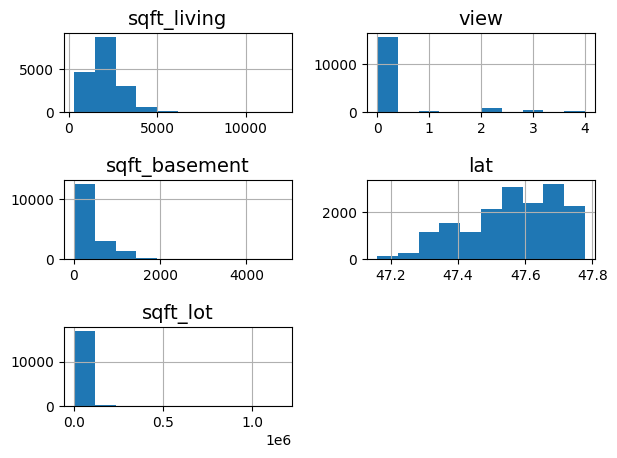

In [101]:
train_set[features_num].hist() #observamos que necesitan tratamiento sqft_living, sqft_basement y sqft_lot principalmente
plt.tight_layout()

In [102]:
train_set_scaled = train_set.copy()


Aplicamos logaritmo para mejorar la distribución, esto se hace antes de la estandarización (establizar la variancia)

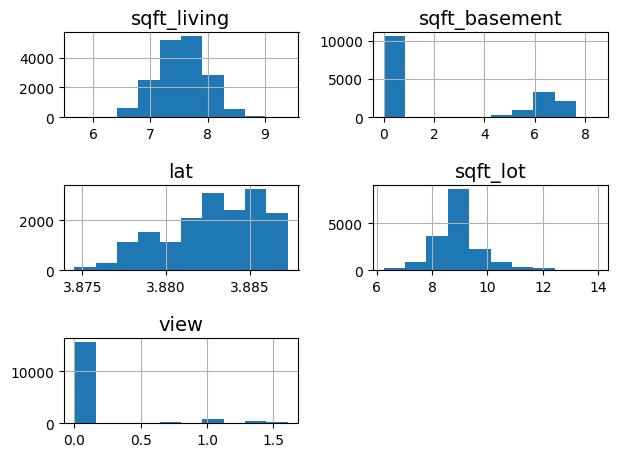

In [103]:
features_transform = ['sqft_living','sqft_basement','lat','sqft_lot','view']
for feature in features_transform:
    train_set_scaled[feature] = train_set_scaled[feature].apply(np.log1p) #aplicamos log+1 ya que hay ceros en el dataset

train_set_scaled[features_transform].hist()
plt.tight_layout();
    

#### Escalación de variables númericas

In [104]:
scaler = StandardScaler()
scaler.fit(train_set_scaled[features_num]) #con el fit aprende

StandardScaler()

In [105]:
scaler.scale_

array([4.23197150e-01, 3.61054300e-01, 3.16415980e+00, 2.85263876e-03,
       8.99763457e-01])

In [106]:
train_set_scaled[features_num] =scaler.transform(train_set_scaled[features_num]) #con el transform aplica

In [107]:
features_num

['sqft_living', 'view', 'sqft_basement', 'lat', 'sqft_lot']

In [108]:
train_set_scaled[features_num].describe()

,sqft_living,view,sqft_basement,lat,sqft_lot
count,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04
mean,6.733512e-16,4.808184e-17,-1.799987e-16,7.211372e-14,-1.091704e-15
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-4.431742e+00,-3.207240e-01,-7.927098e-01,-2.905591e+00,-3.029741e+00
25%,-6.679988e-01,-3.207240e-01,-7.927098e-01,-6.367980e-01,-5.158655e-01
50%,1.549629e-02,-3.207240e-01,-7.927098e-01,8.421998e-02,-5.086331e-02
75%,6.887783e-01,-3.207240e-01,1.202049e+00,8.498504e-01,3.195730e-01
max,4.366946e+00,4.136882e+00,1.887539e+00,1.566383e+00,5.541741e+00


## Apliación de Train en Test

In [109]:
floor_mapping = [
    test_set["floors"] > 2,
    (test_set["floors"] > 1) & (test_set["floors"] <= 2),
    test_set["floors"] <= 1
]# transformarmos los números a letras para una mejor visulazación utilizando el ordinal enconder.

floor_category_mapping = ["A","B","C"]

test_set["floors_category"] = np.select(floor_mapping, floor_category_mapping, default="C") 

categories = [["A", "B", "C"]] # se ordena por órden de relevancia, a mayor pisos, más caro
ordinal_encoder = OrdinalEncoder(categories= categories)
test_set["ordinal_floors"] = ordinal_encoder.fit_transform(test_set[["floors_category"]]) 

test_set[["ordinal_floors","floors_category","floors"]].sample(10) #miramos los resultados y si hacen setido con lo esperado

,ordinal_floors,floors_category,floors
19470,2.0,C,1.0
6253,2.0,C,1.0
10877,1.0,B,2.0
5503,2.0,C,1.0
13888,1.0,B,2.0
10560,1.0,B,2.0
21387,1.0,B,2.0
9251,2.0,C,1.0
20415,0.0,A,3.0
9264,2.0,C,1.0


In [110]:
bedrooms_mapping = [
    test_set["bedrooms"] > 5,
    (test_set["bedrooms"] > 4) & (test_set["bedrooms"] <= 5),
    (test_set["bedrooms"] > 3) & (test_set["bedrooms"] <= 4),
    (test_set["bedrooms"] > 2) & (test_set["bedrooms"] <= 3),
    (test_set["bedrooms"] <= 2)
    
]# transformarmos los números a letras para una mejor visulazación utilizando el ordinal enconder.

bedrooms_category_mapping = ["A","B","C","D","E"] #Definimos las categorías

test_set["bedrooms_category"] = np.select(bedrooms_mapping, bedrooms_category_mapping, default="E") 

categories = [["A", "B", "C", "D", "E"]] # se ordena por órden de relevancia, a mayor pisos, más caro
ordinal_encoder = OrdinalEncoder(categories= categories)
test_set["ordinal_bedrooms"] = ordinal_encoder.fit_transform(test_set[["bedrooms_category"]]) 

test_set[["ordinal_bedrooms","bedrooms_category","bedrooms"]].sample(10) #miramos los resultados


,ordinal_bedrooms,bedrooms_category,bedrooms
8729,3.0,D,3
18676,3.0,D,3
4973,2.0,C,4
3323,3.0,D,3
8504,3.0,D,3
15295,3.0,D,3
21328,2.0,C,4
5214,2.0,C,4
14044,2.0,C,4
2171,3.0,D,3


In [111]:
condition_mapping = [
    test_set["condition"] > 3,
    test_set["condition"] <= 3
    
]# transformarmos los números a letras para una mejor visulazación utilizando el ordinal enconder.

condition_category_mapping = ["Malo","Bueno"] #Definimos las categorías

test_set["condition_category"] = np.select(condition_mapping, condition_category_mapping, default="B") 

categories = [["Bueno", "Malo"]] # se ordena por órden de relevancia, a mayor pisos, más caro
ordinal_encoder = OrdinalEncoder(categories= categories)
test_set["ordinal_condition"] = ordinal_encoder.fit_transform(test_set[["condition_category"]]) 

test_set[["ordinal_condition","condition_category","condition"]].sample(10) #miramos los resultados

,ordinal_condition,condition_category,condition
13138,1.0,Malo,5
14584,0.0,Bueno,3
12845,0.0,Bueno,3
17307,0.0,Bueno,3
10418,0.0,Bueno,3
13634,0.0,Bueno,3
6011,0.0,Bueno,3
9926,0.0,Bueno,3
17526,1.0,Malo,4
6355,0.0,Bueno,3


In [112]:
grade_mapping = [
    test_set["grade"] > 10,
    (test_set["grade"] > 7) & (test_set["grade"] <= 10),
    (test_set["grade"] > 4) & (test_set["grade"] <= 7),
    (test_set["grade"] <= 4)
    
]# transformarmos los números a letras para una mejor visulazación utilizando el ordinal enconder.

grade_category_mapping = ["Malo","Normal","Bueno","Muy bueno"] #Definimos las categorías

test_set["grade_category"] = np.select(grade_mapping, grade_category_mapping, default="Malo") 

categories = [["Muy bueno","Bueno","Normal", "Malo"]] # se ordena por órden de relevancia, a mayor pisos, más caro
ordinal_encoder = OrdinalEncoder(categories= categories)
test_set["ordinal_grade"] = ordinal_encoder.fit_transform(test_set[["grade_category"]])

test_set[["ordinal_grade","grade_category","grade"]].sample(10) #miramos los resultados


,ordinal_grade,grade_category,grade
13688,1.0,Bueno,7
2725,1.0,Bueno,7
10184,2.0,Normal,10
410,1.0,Bueno,7
12484,1.0,Bueno,5
19925,2.0,Normal,8
3096,1.0,Bueno,6
8509,2.0,Normal,8
9975,1.0,Bueno,7
15243,2.0,Normal,8


In [113]:
bathrooms_mapping = [
    test_set["bathrooms"] > 5.0,
    (test_set["bathrooms"] > 2.5) & (test_set["bathrooms"] <= 5.0),
    test_set["bathrooms"] <= 2.5
]

bathrooms_category_mapping = ['A', 'B', 'C'] #Definimos las categorías

test_set["bathrooms_category"] = np.select(bathrooms_mapping, bathrooms_category_mapping) 

categories = [["A","B","C"]] # se ordena por órden de relevancia, a mayor pisos, más caro
ordinal_encoder = OrdinalEncoder(categories= categories)
test_set["ordinal_bathrooms"] = ordinal_encoder.fit_transform(test_set[["bathrooms_category"]]) 

test_set[["ordinal_bathrooms","bathrooms_category","bathrooms"]].sample(10) #miramos los resultados

,ordinal_bathrooms,bathrooms_category,bathrooms
12813,2.0,C,2.50
2988,2.0,C,2.50
18305,2.0,C,2.25
12711,2.0,C,2.50
18038,2.0,C,1.50
520,2.0,C,1.00
5140,1.0,B,2.75
13775,1.0,B,2.75
3393,2.0,C,1.00
843,2.0,C,2.25


In [114]:
test_set_scaled = test_set.copy()

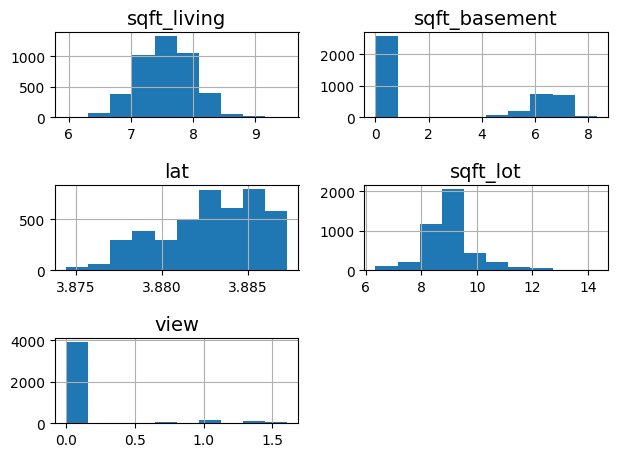

In [115]:
features_transform = ['sqft_living','sqft_basement','lat','sqft_lot','view']
for feature in features_transform:
    test_set_scaled[feature] = test_set_scaled[feature].apply(np.log1p) #aplicamos log+1 ya que hay ceros en el dataset

test_set_scaled[features_transform].hist()
plt.tight_layout();

In [116]:
scaler = StandardScaler()
scaler.fit(test_set_scaled[features_num]) #con el fit aprende

StandardScaler()

In [117]:
scaler.scale_

array([4.29823576e-01, 3.67278694e-01, 3.19459362e+00, 2.86620927e-03,
       9.11448307e-01])

In [118]:
test_set_scaled[features_num] =scaler.transform(test_set_scaled[features_num]) #con el transform aplica

## Determinación de X,y

In [119]:
features_all = features_cat + features_num

In [120]:
features_all

['ordinal_floors',
 'ordinal_bedrooms',
 'ordinal_condition',
 'ordinal_grade',
 'ordinal_bathrooms',
 'sqft_living',
 'view',
 'sqft_basement',
 'lat',
 'sqft_lot']

In [121]:
X_train = train_set[features_all]
y_train = train_set[target]

X_test = test_set[features_all]
y_test = test_set[target]

X_test_scaled = test_set_scaled[features_all]
X_train_scaled = train_set_scaled[features_all]


In [122]:
X_train

,ordinal_floors,ordinal_bedrooms,ordinal_condition,ordinal_grade,ordinal_bathrooms,sqft_living,view,sqft_basement,lat,sqft_lot
6325,2.0,3.0,1.0,2.0,2.0,1780,0,0,47.3670,13095
13473,2.0,4.0,0.0,1.0,2.0,1000,0,200,47.5520,3700
17614,1.0,3.0,0.0,1.0,2.0,1080,0,90,47.4838,7486
16970,2.0,3.0,1.0,1.0,2.0,2090,0,810,47.3951,7500
20868,1.0,4.0,0.0,2.0,2.0,1741,0,295,47.7043,1439
...,...,...,...,...,...,...,...,...,...,...
11964,2.0,3.0,0.0,1.0,2.0,1000,0,0,47.7144,6914
21575,1.0,3.0,0.0,2.0,2.0,3087,0,0,47.2974,5002
5390,1.0,3.0,0.0,1.0,2.0,2120,0,0,47.6810,4780
860,2.0,4.0,0.0,1.0,2.0,380,0,0,47.4810,15000


In [123]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17290 entries, 6325 to 15795
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ordinal_floors     17290 non-null  float64
 1   ordinal_bedrooms   17290 non-null  float64
 2   ordinal_condition  17290 non-null  float64
 3   ordinal_grade      17290 non-null  float64
 4   ordinal_bathrooms  17290 non-null  float64
 5   sqft_living        17290 non-null  int64  
 6   view               17290 non-null  int64  
 7   sqft_basement      17290 non-null  int64  
 8   lat                17290 non-null  float64
 9   sqft_lot           17290 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 1.5 MB


In [124]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 17290 entries, 6325 to 15795
Series name: price
Non-Null Count  Dtype  
--------------  -----  
17290 non-null  float64
dtypes: float64(1)
memory usage: 270.2 KB


# Modelado

In [125]:
train_set.price.mean()

537768.5916136495

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [154]:
base_clf = RandomForestRegressor(max_depth = 5, random_state= 42)

In [127]:
model_names = ["Regresion Lineal","DecisionTree","Random Forest","XGBoost","LightGBM","CatBoost"]
lr_clf = LinearRegression()
tree_clf = DecisionTreeRegressor(random_state= 42)
rf_clf = RandomForestRegressor(random_state= 42)
xgb_clf = XGBRegressor(random_state = 42)
lgb_clf = LGBMRegressor(random_state= 42, verbose = -100)
cat_clf = CatBoostRegressor(random_state= 42, verbose = False)

model_set = [lr_clf, tree_clf, rf_clf, xgb_clf, lgb_clf, cat_clf]


### Comparación con Validación Cruzada (pre-optimización)

In [142]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre == "Regresion Lineal":
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 10, scoring = "neg_mean_squared_error") #neg se usa porque siempre usa el cv scor para comparar siempre busca metrica en positivo, más quiere decir mejor, en error cuadratico medio mas es peor, por eso ponemos negativo 
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LinearRegression()
DecisionTreeRegressor(random_state=42)
RandomForestRegressor(random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
LGBMRegressor(random_state=42, verbose=-100)


In [143]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, RMSE_CV: {np.sqrt(-np.mean(valores))}")
print(f"El ganador es {ganador}")

Model <Regresion Lineal>, RMSE_CV: 238676.50717261527
Model <DecisionTree>, RMSE_CV: 226409.54825226974
Model <Random Forest>, RMSE_CV: 162590.23966995688
Model <XGBoost>, RMSE_CV: 166214.57361281535
Model <LightGBM>, RMSE_CV: 166157.44009152564
Model <CatBoost>, RMSE_CV: 160364.60771949138
El ganador es CatBoost


### Optimizacion del Ganador

In [149]:
params_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    #"min_samples_leaf": [10,20,40], #queremos que las hojas tengan pocas muestras, porque queremos regresionar a un montón de valores
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1]
}

rf_grid = GridSearchCV(rf_clf,
                       param_grid= params_grid,
                       cv = 10,
                       scoring = "neg_mean_squared_error",
                       n_jobs = -1)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [0.3, 0.6, 1],
                         'n_estimators': [100, 200, 400]},
             scoring='neg_mean_squared_error')

In [150]:
np.sqrt(-rf_grid.best_score_)

165159.53178535565

In [151]:
np.sqrt(-rf_grid.best_score_)

165159.53178535565

In [152]:
rf_grid.best_params_

{'max_depth': 10,
 'max_features': None,
 'max_samples': 0.6,
 'n_estimators': 200}

In [153]:
y_pred = rf_grid.best_estimator_.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MAPE:", mean_absolute_percentage_error(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred))) #tengo un 65% de error vs mediana

MAE: 95705.38385313602
MAPE: 0.1668164043718723
RMSE: 188256.77597885733


In [159]:
#xgb_clf = XGBRegressor(max_depht=5, random_state=42)
#lgb_clf = LGBMRegressor(max_depth=5,verbose = 100)

#for nombre,modelo in zip(["Random Forest","XGboost","LightGBM"],[base_clf,xgb_clf,lgb_clf]):
#   print(f"para {nombre}:",end = " ")
#   print(np.mean(cross_val_score(modelo,X_train,y_train, cv = 5, scoring="neg_mean_squared_error")))

In [160]:
metricas_optimizadas = {}

In [164]:
### Linear Regresion
from sklearn.linear_model import ElasticNet

param_grid = {
    "alpha": [0.1, 1, 10, 100],
    "l1_ratio": [0.2,0.4,0.6,1]

} 
model = ElasticNet()
lr_grid = RandomizedSearchCV( model,
                             cv = 5, 
                             n_iter = 20,
                             param_distributions= param_grid,
                             scoring= "neg_mean_squared_error"
)

lr_grid.fit(X_train_scaled,y_train)
print("LR best_score:", np.sqrt(-lr_grid.best_score_))
metricas_optimizadas["Linear Regresion"] = np.sqrt(-lr_grid.best_score_)

c:\Users\stefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LR best_score: 238678.22577900416


In [163]:
### RandomForest

rf_clf = RandomForestRegressor()

param_grid = {
    "n_estimators": [100,200,400],
    "max_depth": [2,4,10],
    "max_features": ["sqrt","log2",None],
    "max_samples": [0.3,0.6,1]
}

rf_grid = RandomizedSearchCV(rf_clf, 
                               cv = 5,
                               n_iter = 20,
                               param_distributions= param_grid, 
                               scoring = "neg_mean_squared_error")


rf_grid.fit(X_train, y_train)
print("RF best_score:", np.sqrt(-rf_grid.best_score_))
metricas_optimizadas["RandomForest"] = np.sqrt(-rf_grid.best_score_)

RF best_score: 166405.38001632364


In [165]:
### CatBoost

cat_clf = CatBoostRegressor(verbose = False)

param_grid= {'depth': [3, 6, 12],
          'learning_rate': [0.1, 0.2, 0.3, 0.4],
          #'bagging_fraction': [0.3,0.6,1], No hay hiperparámetro equivalente
          'colsample_bylevel': [0.5,1],
          'iterations': [100, 250, 500, 750],
          "border_count": [125,250]
          }


cat_grid = RandomizedSearchCV(cat_clf, 
                               cv = 5,
                               n_iter = 3,
                               param_distributions= param_grid, 
                               scoring = "neg_mean_squared_error")


cat_grid.fit(X_train, y_train)
print("CatBoost best_score:", np.sqrt(-cat_grid.best_score_))
metricas_optimizadas["CatBoost"] = np.sqrt(-cat_grid.best_score_)

CatBoost best_score: 162483.4940452142
